
# Project: Investigate show up appointments in Brazil.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset characteristics
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether patients show up for their appointment. Several characteristics about the patient are included in each row.

### Data Dictionary

- PatientId - Identification of a patient 
- AppointmentID - Identification of each appointment
- Gender = Male or Female. 
    - Female is the greater proportion, woman takes way more care of they health in comparison to man. 
- ScheduledDay = The day of the actual appointment, when they have to visit the doctor. 
- AppointmentDay = The day someone called or registered the appointment, this is before appointment of course.
- Age = How old is the patient. 
- Neighbourhood = Where the appointment takes place. 
- Scholarship = Ture of False. 
    - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Hipertension = True or False 
- Diabetes = True or False 
- Alcoholism = True or False 
- Handcap =  Number of disabilities a person has. (1, 2, 3, 4)
- SMS_received = 1 or more messages sent to the patient. 
- No-show = True or False.
    - Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Source: https://www.kaggle.com/joniarroba/noshowappointments


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [217]:
df = pd.read_csv('noshow.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Some variables format can be changed for better analysis
- No missing values

In [219]:
df.shape

(110527, 14)

In [220]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning

In [221]:
#Drop PatientID and AppointmentID
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

- PatientID is less than AppointmentID which indicates that many patients scheduled more than one visit in the period
    - but this will not be analyzed in this work

In [222]:
#Rename Columns
df.rename(columns=lambda x: x.lower(), inplace=True)
df.rename(index=str, columns={"no-show": "no_show"}, inplace=True)

df.head()

gender          scheduledday        appointmentday  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  no_show  
0      No  
1      No  
2      No  
3      No  
4      No

In [223]:
#Change Data Type

df['no_show'] = df.no_show.replace({'Yes': 1, 'No': 0})
#df['gender'] = df.gender.replace({'M': 1, 'F': 0})

df['scheduledday'] = pd.to_datetime(df.scheduledday)
df['appointmentday'] = pd.to_datetime(df.appointmentday)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 11.0+ MB


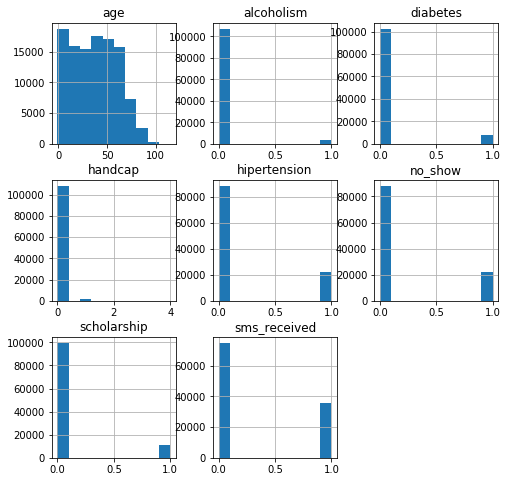

In [224]:
df.hist(figsize=(8, 8));

- I believe that the most important thing here is that there are more people who attend than those who do not.
- The analysis will be made upon the people who do not attend.

<a id='eda'></a>
## Exploratory Data Analysis

### Which age group has the highest attendance?

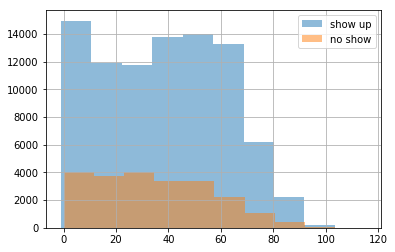

In [225]:
df.age[df.no_show == 0].hist(alpha=0.5, label='show up')
df.age[df.no_show == 1].hist(alpha=0.5, label='no show')
plt.legend();

- Primary look

In [226]:
df.describe().age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [227]:
df.loc[df['age'] < 0]

gender        scheduledday appointmentday  age neighbourhood  \
99832      F 2016-06-06 08:58:13     2016-06-06   -1         ROMÃO   

       scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
99832            0             0         0           0        0             0   

       no_show  
99832        0

Probably a mistake.
- If it were a pattern of unborn babies there would be more. 
- Therefore, this data will be excluded.

In [228]:
df.drop(df.index[99832], inplace=True)

In [229]:
df.loc[df['age'] < 0]

Empty DataFrame
Columns: [gender, scheduledday, appointmentday, age, neighbourhood, scholarship, hipertension, diabetes, alcoholism, handcap, sms_received, no_show]
Index: []

In [230]:
df.describe().age

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [231]:
bin_edges = [0, 9, 16, 25, 35, 50, 65, 75, 115]
bin_names = ['0 - 9', '10 - 16', '17 - 25', '26 - 35', '36 - 50', '51 - 65', '65 - 75', '76 - 115']

df['age_stages'] = pd.cut(df['age'], bin_edges, labels=bin_names)

df.head()

gender        scheduledday appointmentday  age      neighbourhood  \
0      F 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA   
1      M 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA   
2      F 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA   
3      F 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI   
4      F 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

   no_show age_stages  
0        0    51 - 65  
1        0    51 - 65  
2        0    51 - 65  
3        0      0 - 9  
4        0    51 - 65

- Creating age groups

In [232]:
print(df.shape, '\n')
df.count()

(110526, 13) 



gender            110526
scheduledday      110526
appointmentday    110526
age               110526
neighbourhood     110526
scholarship       110526
hipertension      110526
diabetes          110526
alcoholism        110526
handcap           110526
sms_received      110526
no_show           110526
age_stages        106987
dtype: int64

In [233]:
df.isnull().sum()

gender               0
scheduledday         0
appointmentday       0
age                  0
neighbourhood        0
scholarship          0
hipertension         0
diabetes             0
alcoholism           0
handcap              0
sms_received         0
no_show              0
age_stages        3539
dtype: int64

In [234]:
df[df.age_stages.isnull()].head()

gender        scheduledday appointmentday  age      neighbourhood  \
59      F 2016-04-29 08:08:43     2016-04-29    0          CONQUISTA   
63      M 2016-04-27 10:46:12     2016-04-29    0       SÃO BENEDITO   
64      M 2016-04-25 13:28:21     2016-04-29    0  ILHA DAS CAIEIRAS   
65      M 2016-04-27 10:48:50     2016-04-29    0          CONQUISTA   
67      F 2016-04-29 08:53:02     2016-04-29    0     NOVA PALESTINA   

    scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
59            0             0         0           0        0             0   
63            0             0         0           0        0             0   
64            0             0         0           0        0             1   
65            0             0         0           0        0             0   
67            0             0         0           0        0             0   

    no_show age_stages  
59        0        NaN  
63        0        NaN  
64        0        NaN  
65        0        NaN  
67        0        NaN

- For some reason these data are not entering the groups.
    - The zero will be replaced by a near and negative value.

In [235]:
bin_edges = [-0.1, 9, 16, 25, 35, 50, 65, 75, 115]
bin_names = ['Child(0-9)', 
             'Adolescent(10-16)', 
             'Young(17 - 25)', 
             'Adult(26-35)', 
             'Mature(36-50)', 
             'Ageing(51-65)', 
             'Old(65-75)', 
             'Elderly(76-115)']

df['age_stages'] = pd.cut(df['age'], bin_edges, labels=bin_names)

df.head()

gender        scheduledday appointmentday  age      neighbourhood  \
0      F 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA   
1      M 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA   
2      F 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA   
3      F 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI   
4      F 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

   no_show     age_stages  
0        0  Ageing(51-65)  
1        0  Ageing(51-65)  
2        0  Ageing(51-65)  
3        0     Child(0-9)  
4        0  Ageing(51-65)

In [236]:
df.isnull().sum()

gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
age_stages        0
dtype: int64

In [237]:
df.no_show.sum()

22319

In [238]:
df_age = (df.groupby('age_stages').sum().no_show / df.no_show.sum())*100
df_age

age_stages
Child(0-9)           15.610018
Adolescent(10-16)     9.485192
Young(17 - 25)       14.413728
Adult(26-35)         14.704960
Mature(36-50)        20.126350
Ageing(51-65)        16.403065
Old(65-75)            5.358663
Elderly(76-115)       3.898024
Name: no_show, dtype: float64

- Percentage only over people who do not attend.

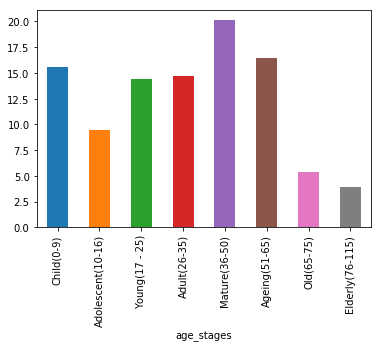

In [239]:
df_age.plot(kind='bar');

### Which neighborhood shows the highest attendance rate?

In [240]:
df_neigh = (df.groupby('neighbourhood').sum().no_show / df.no_show.sum())*100
df_neigh.describe()

count    81.000000
mean      1.234568
std       1.245537
min       0.000000
25%       0.309154
50%       0.802007
75%       1.917649
max       6.563914
Name: no_show, dtype: float64

In [241]:
type(df_neigh)

pandas.core.series.Series

In [242]:
a = df_neigh.sum() - df_neigh.nlargest(5).sum() #TOP 5 neighbourhoods
a

76.62977731977239

In [243]:
df_neigh = df_neigh.nlargest(5)
df_neigh = df_neigh.append(pd.Series(a, index=['OTHERS']))
df_neigh

JARDIM CAMBURI     6.563914
MARIA ORTIZ        5.461714
ITARARÉ            4.135490
RESISTÊNCIA        4.059322
CENTRO             3.149783
OTHERS            76.629777
dtype: float64

- Show only the 5 neighborhoods with the highest rates of non-attendance.
- The others are grouped as 'others'

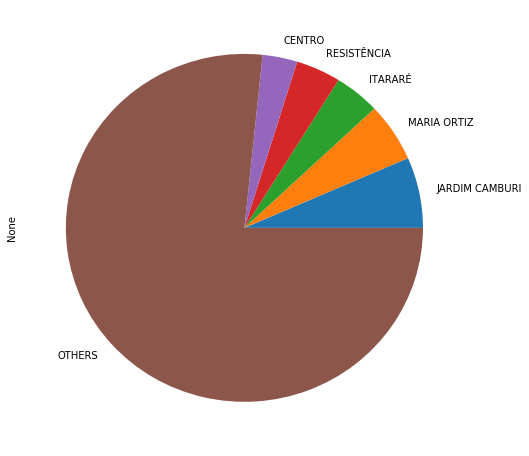

In [244]:
df_neigh.plot.pie(y='neighborhood', figsize=(8, 8));

### Which gender has the highest attendance?

- Since it has been said in advance that there is a greater proportion of females, it is attempted to readjust to a more coherent view.

In [245]:
M = df[df['gender'] == 'M'].shape
M[0]

38687

In [246]:
F = df[df['gender'] == 'F'].shape
F[0]

71839

In [247]:
df_gen = df.groupby('gender').sum().no_show
df_gen

gender
F    14594
M     7725
Name: no_show, dtype: int64

In [248]:
(df_gen[0]/F[0])*100

20.314870752655242

In [249]:
(df_gen[1]/M[0])*100

19.967947889471915

In [250]:
df_gen = pd.Series([(df_gen[0]/F[0])*100, (df_gen[1]/M[0])*100], index=['Female', 'Male'])
df_gen

Female    20.314871
Male      19.967948
dtype: float64

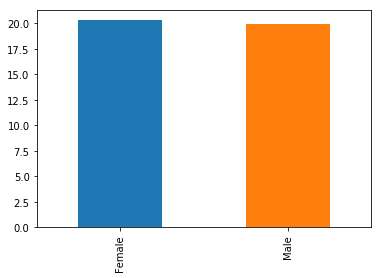

In [251]:
df_gen.plot(kind='bar');

- It is noted that, in due proportions, there is  is an insignificant difference between genders.

### Do people who receive SMS tend to attend more?

- The same proportion adjustment was made in this section

In [252]:
a = df[df['sms_received'] == 1].shape
a[0]

35482

In [253]:
b = df[df['sms_received'] == 0].shape
b[0]

75044

In [254]:
df_sms = df.groupby('sms_received').sum().no_show
df_sms

sms_received
0    12535
1     9784
Name: no_show, dtype: int64

In [255]:
df_sms = pd.Series([(df_sms[1]/a[0])*100, (df_sms[0]/b[0])*100], index=['Not Received', 'Received'])
df_sms

Not Received    27.574545
Received        16.703534
dtype: float64

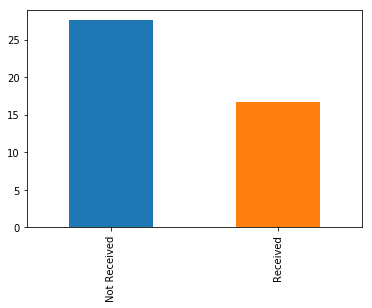

In [256]:
df_sms.plot(kind='bar');

- Here, there is a reduction in the rate of non-attendance by almost 11% among people who received SMS.

### People receiving Bolsa Família show up more?
>The same proportion adjustment was made in this section

In [257]:
a = df[df['scholarship'] == 1].shape
a[0]

10861

In [258]:
b = df[df['scholarship'] == 0].shape
b[0]

99665

In [259]:
df_scholar = df.groupby('scholarship').sum().no_show
df_scholar

scholarship
0    19741
1     2578
Name: no_show, dtype: int64

In [260]:
df_scholar = pd.Series([(df_scholar[0]/b[0])*100, (df_scholar[1]/a[0])*100], index=['Not Received', 'Received'])
df_scholar

Not Received    19.807355
Received        23.736304
dtype: float64

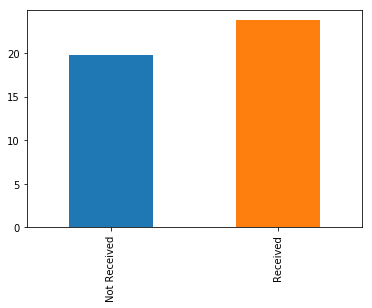

In [261]:
df_scholar.plot(kind='bar');

### The greater the number of disabilities, the greater the chances of attending?
>To avoid repetition, here was done in a different way.

In [262]:
df_han = df.groupby('handcap').sum().no_show
df_han

handcap
0    21912
1      366
2       37
3        3
4        1
Name: no_show, dtype: int64

- There are many more people who do not have some kind of disability.

In [263]:
df[df['handcap'] == 0].count().no_show

108285

In [264]:
for i in range(5):
    df_han[i] = (df_han[i] / df[df['handcap'] == i].count().no_show)*100
df_han

handcap
0    20
1    17
2    20
3    23
4    33
Name: no_show, dtype: int64

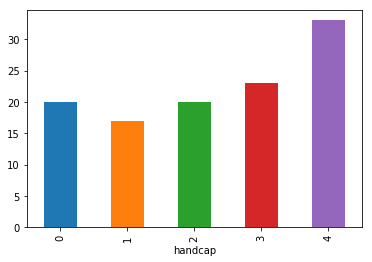

In [265]:
df_han.plot(kind='bar');

### What month were there more appearances?
Ref: https://www.youtube.com/watch?v=yCgJGsg0Xa4

In [266]:
df.appointmentday.max() - df.appointmentday.min()

Timedelta('40 days 00:00:00')

In [267]:
df.appointmentday.max() - df.scheduledday.min()

Timedelta('210 days 16:46:04')

>Number of days data was collected

In [268]:
print('Schedule')
print(df.scheduledday.min())
print(df.scheduledday.max())
print('-------------------------')
print('Appointment')
print(df.appointmentday.min())
print(df.appointmentday.max())

Schedule
2015-11-10 07:13:56
2016-06-08 20:07:23
-------------------------
Appointment
2016-04-29 00:00:00
2016-06-08 00:00:00


In [269]:
df.scheduledday.max() - df.scheduledday.min()

Timedelta('211 days 12:53:27')

- Here we have an incompatibility.
    - Since the "appointment day" column has no time, there are probably appointments scheduled on the same day, but all data was recorded at the end of the day.
    - So for a better understanding, let's add 23:59 hours to all data.

In [270]:
appointmentday = []
for value in df.appointmentday:
    value += pd.Timedelta('+23:59:00')
    appointmentday.append(value)
df['appointmentday'] = appointmentday
df.appointmentday.head()

0   2016-04-29 23:59:00
1   2016-04-29 23:59:00
2   2016-04-29 23:59:00
3   2016-04-29 23:59:00
4   2016-04-29 23:59:00
Name: appointmentday, dtype: datetime64[ns]

>https://pandas.pydata.org/pandas-docs/stable/timedeltas.html

In [271]:
df.appointmentday.max() - df.scheduledday.min()

Timedelta('211 days 16:45:04')

> Before was: Timedelta ('210 days 16:46:04')

In [272]:
df['apmonth'] = df.appointmentday.dt.month
df['scmonth'] = df.scheduledday.dt.month
df.head()

gender        scheduledday      appointmentday  age      neighbourhood  \
0      F 2016-04-29 18:38:08 2016-04-29 23:59:00   62    JARDIM DA PENHA   
1      M 2016-04-29 16:08:27 2016-04-29 23:59:00   56    JARDIM DA PENHA   
2      F 2016-04-29 16:19:04 2016-04-29 23:59:00   62      MATA DA PRAIA   
3      F 2016-04-29 17:29:31 2016-04-29 23:59:00    8  PONTAL DE CAMBURI   
4      F 2016-04-29 16:07:23 2016-04-29 23:59:00   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

   no_show     age_stages  apmonth  scmonth  
0        0  Ageing(51-65)        4        4  
1        0  Ageing(51-65)        4        4  
2        0  Ageing(51-65)        4        4  
3        0     Child(0-9)        4        4  
4        0  Ageing(51-65)        4        4

In [273]:
df_sc = df.groupby('scmonth').sum().no_show
#df_sc = pd.DataFrame(df_sc)
df_sc

scmonth
1        18
2        82
3      1196
4      7849
5     11769
6      1386
11        0
12       19
Name: no_show, dtype: int64

In [274]:
sc = []
for i in range(1,7):
    sc.append(df[df['scmonth'] == i].count().no_show)
for i in range(11,13):
    sc.append(df[df['scmonth'] == i].count().no_show)
sc

[60, 281, 3614, 25339, 67421, 13749, 1, 61]

In [275]:
df_sch = (df_sc.values / sc)*100
df_sch

array([30.        , 29.18149466, 33.09352518, 30.9759659 , 17.45598552,
       10.08073314,  0.        , 31.14754098])

In [276]:
df_sch = pd.DataFrame(df_sch, index=['03', '04', '05', '06', '07', '08', '01', '02'], columns=['No-show Percentage'])
df_sch

No-show Percentage
03           30.000000
04           29.181495
05           33.093525
06           30.975966
07           17.455986
08           10.080733
01            0.000000
02           31.147541

In [277]:
df_sch = df_sch.sort_index()
labels = ['Nov/15', 'Dec/15', 'Jan/16', 'Feb/16', 'Mar/16', 'Apr/16', 'May/16', 'Jun/16']
df_sch.index = labels
df_sch

No-show Percentage
Nov/15            0.000000
Dec/15           31.147541
Jan/16           30.000000
Feb/16           29.181495
Mar/16           33.093525
Apr/16           30.975966
May/16           17.455986
Jun/16           10.080733

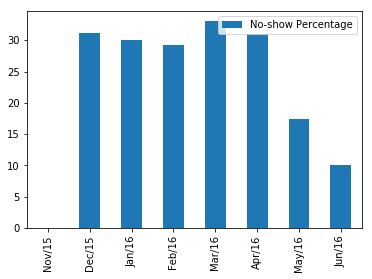

In [278]:
df_sch.plot(kind='bar');

- Percentage of attendances in relation to the number of appointments scheduled in each month.
    - In Nov / 15, there was an attendance in the single appointment scheduled that month, resulting in 0%

### What about hipertesion, diabetes and alcoholic people?

In [279]:
df_des = (df.groupby(['hipertension', 'diabetes', 'alcoholism']).sum().no_show / 
        df.groupby(['hipertension', 'diabetes', 'alcoholism']).count().no_show)*100
df_des

hipertension  diabetes  alcoholism
0             0         0             20.909379
                        1             21.461421
              1         0             19.985518
                        1             17.105263
1             0         0             17.080876
                        1             18.487395
              1         0             17.576244
                        1             17.968750
Name: no_show, dtype: float64

In [280]:
df.groupby(['hipertension', 'diabetes', 'alcoholism']).count().no_show

hipertension  diabetes  alcoholism
0             0         0             85311
                        1              1957
              1         0              1381
                        1                76
1             0         0             14244
                        1              1071
              1         0              6230
                        1               256
Name: no_show, dtype: int64

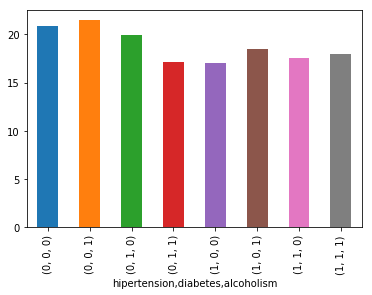

In [281]:
df_des.plot(kind='bar');

<a id='conclusions'></a>
## Conclusions

Taking an analysis considering the **proportion** of the data collected, we arrive at some interesting conclusions such as:
   - People aged 36 to 65 tend not to attend more than others.
   
   - The neighborhoods JARDIM CAMBURI, MARIA ORTIZ, ITARARÉ, RESISTÊNCIA and CENTRO in general have the highest rates of non-attendance, without considering scheduling proportions.
   
   - Although women schedule much more consultations, gender is not a factor in the issue of attendance.
   
   - People who receive prior SMS tend to attend more.
   
   - People who receive Family Grant assistance tend **not** to attend.
   
   - People with more deficiencies tend **not** to attend.
   
   - Although the number of appointments scheduled increase over the months, with the peak in May, the percentage of people who do not appear is **decreasing**.
   
   - There are a large number of people with hypertension, diabetes and alcohol problems. Given the proportions, 17 to 20% of people who have none or all three types of problems tend **not** to attend.
   
#### Sugestions
 - The main suggestion is to send more alerts by SMS and maybe other types of alerts can also be created.
 - In addition:
    - Alternative means of alerting people with disabilities may be considered.
    - Any kind of fee could be charged.
    - To supervise the reasons of the people who receive Bolsa Família are missing the consultations.
    - Use some means in which the person can tell if he can attend, giving way to another.
   